# Performing T-test

In [30]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Loss
url = "https://raw.githubusercontent.com/nooriza16/Forestloss/refs/heads/main/Ttest/BII2020_LossSamples_100m.csv"
loss_df = pd.read_csv(url)

# Remaining
url_r = "https://raw.githubusercontent.com/nooriza16/Forestloss/refs/heads/main/Ttest/BII2020_RemainSamples_100m.csv"
remain_df = pd.read_csv(url_r)

In [18]:
loss_df.describe()

,system:index,BII2020
count,670.000000,670.000000
mean,2534.779104,0.805877
std,1447.572635,0.120692
min,0.000000,0.354636
25%,1338.250000,0.750492
50%,2523.500000,0.852290
75%,3851.500000,0.872708
max,4999.000000,0.999280


In [20]:
remain_df.describe()

,system:index,BII2020
count,2921.000000,2921.000000
mean,2494.305033,0.927110
std,1441.105793,0.094572
min,0.000000,0.354636
25%,1266.000000,0.908643
50%,2496.000000,0.959172
75%,3759.000000,0.985900
max,4999.000000,1.000000


In [47]:
from scipy.stats import mannwhitneyu

# Run Mann-Whitney U test
u_stat, p_value = mannwhitneyu(loss_df['BII2020'], 
                               remain_df['BII2020'], 
                               alternative='two-sided')  # use 'less' if you specifically expect loss < remain

print("Mann-Whitney U statistic:", u_stat)
print("p-value:", p_value)


Mann-Whitney U statistic: 281588.0
p-value: 2.469737642518151e-182


C:\Users\nooriza maharani\AppData\Local\Temp\ipykernel_14560\2076801148.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y='BII2020', data=combined_df, palette=['red', 'green'])


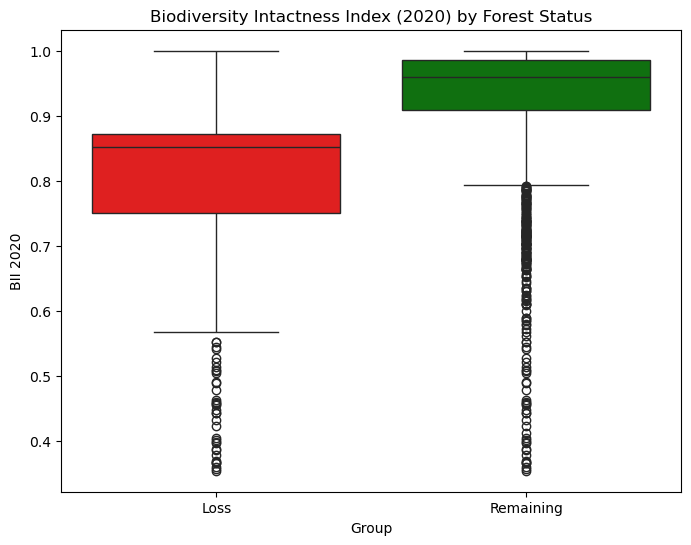

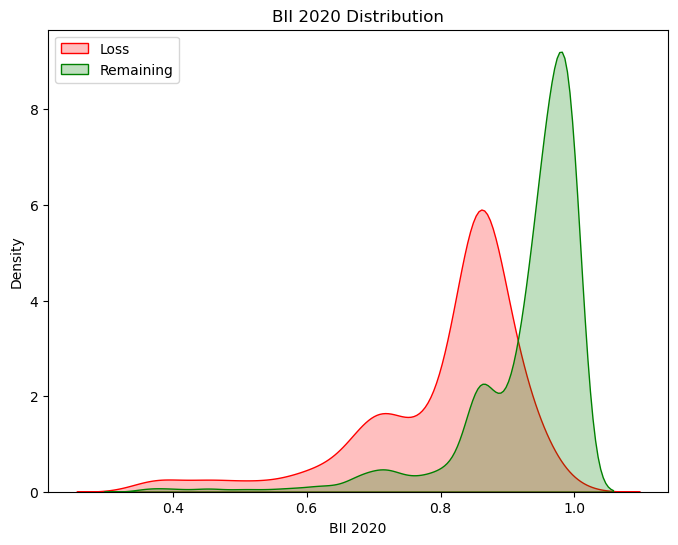

In [32]:
# Add a column to distinguish groups
loss_df['Group'] = 'Loss'
remain_df['Group'] = 'Remaining'

# Combine both datasets
combined_df = pd.concat([loss_df[['BII2020', 'Group']],
                         remain_df[['BII2020', 'Group']]])

# Plot boxplot
plt.figure(figsize=(8,6))
sns.boxplot(x='Group', y='BII2020', data=combined_df, palette=['red', 'green'])
plt.title('Biodiversity Intactness Index (2020) by Forest Status')
plt.ylabel('BII 2020')
plt.show()

# Optional: plot histogram/density
plt.figure(figsize=(8,6))
sns.kdeplot(loss_df['BII2020'], label='Loss', color='red', fill=True)
sns.kdeplot(remain_df['BII2020'], label='Remaining', color='green', fill=True)
plt.title('BII 2020 Distribution')
plt.xlabel('BII 2020')
plt.ylabel('Density')
plt.legend()
plt.show()

**Boxplot Interpretation:**

Loss
- Median BII is lower (~0.85), meaning biodiversity intactness is generally lower in areas that experienced forest loss.
- The IQR is wider than Remaining, showing more variability in BII for lost forest pixels.
- Some very low BII values appear as outliers (below ~0.6).

Remaining (green box)
- Median BII is higher (~0.97), indicating remaining forest has higher biodiversity intactness.
- Narrower IQR, meaning most remaining forest pixels have consistently high BII.
- Few low-BII outliers exist, but most pixels are high.

**Density Plot**

The red (Loss) distribution is skewed slightly left, indicating some lower BII values exist but most losses cluster around 0.8–0.85.
The green (Remaining) distribution is tightly clustered near 1.0, suggesting many regions have high intact BII values.
There is some overlap between the distributions between ~0.8–0.9, meaning some areas are partially degraded but not completely lost.